In [12]:
#import xarray as xr
import pandas as pd
#import rioxarray as rxr
import cartopy
import matplotlib.pyplot as plt
import geopandas as gpd
#from shapely.geometry import Point, LineString, shape
import pyproj
from shapely.geometry import Polygon
import numpy as np

In [20]:
# wrf=xr.open_dataset("C:/Shiyan/dissertation/data/pm25/wrf_chem/wrfout_hourly_d01_2021-01-01_01-00-00.nc")
# wrf_la = wrf[['PM2_5_DRY_SFC']]

la=gpd.read_file('C:/Shiyan/dissertation/data/LA/County_Boundary.shp')
ss=gpd.read_file('C:/Shiyan/dissertation/data/locations/ppa_epa_loc_wgs.geojson')
wrf=gpd.read_file('C:/Shiyan/dissertation/data/locations/wrf_loc_wgs.geojson')

In [21]:
ss.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
# sensor = gpd.read_file('C:/Shiyan/dissertation/data/pm25/sensor_location/ppa_epa_prj.geojson')
# gdf_s = sensor[['single_id','lat','lng']]

# sgdf = gpd.GeoDataFrame(
#     gdf_s, geometry=gpd.points_from_xy(gdf_s.lng, gdf_s.lat))

# ssrgdf = sgdf.set_crs('EPSG:4326')

# ssrgdf.to_file('C:/Shiyan/dissertation/data/locations/ppa_epa_loc_wgs.geojson')

In [4]:
# min_lat = 32.6
# max_lat = 35.0
# min_lon = -119.0
# max_lon = -117.5

# #wrf2 = wrf2.where((wrf2['XLAT'] >= min_lat) & (wrf2['XLAT'] <= max_lat) & (wrf2['XLONG'] <= max_long) & (wrf2['XLONG'] >= min_long))
# mask_lon = (wrf_la.XLONG >= min_lon) & (wrf_la.XLONG <= max_lon)
# mask_lat = (wrf_la.XLAT >= min_lat) & (wrf_la.XLAT <= max_lat)

# cropped_ds = wrf_la.where(mask_lon & mask_lat, drop=True)

In [5]:
# cropped_ds['PM2_5_DRY_SFC'].plot()

In [6]:
# df = cropped_ds.to_dataframe().reset_index()
# wgdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.XLONG, df.XLAT))

# wrgdf = wgdf.set_crs('EPSG:4326')
# wrgdf.to_file('C:/Shiyan/dissertation/data/locations/wrf_loc_wgs.geojson')

In [28]:

#crs.to_epsg()

In [54]:
proj_daymet = "+proj=lcc +lat_0=42.5 +lon_0=-100 +lat_1=40 +lat_2=70.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
# #"+proj=lcc +lat_0=42.5 +lon_0=-100 +lat_1=25 +lat_2=60 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs" #my custom CRS
# #''+proj=lcc +lat_0=33.5 +lon_0=-118 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs +type=crs''

# #lat = 31.177685 
# #lon = -87.103554

# gdf_pr = pyproj.Proj(proj_daymet)#(df.XLONG, df.XLAT)

In [55]:
# prj = gdf_pr.to_proj4()
# prj

In [41]:
crs1 = pyproj.CRS.from_user_input("+proj=lcc +lat_0=42.5 +lon_0=-100 +lat_1=40 +lat_2=70.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")

In [42]:
crs1

<Projected CRS: +proj=lcc +lat_0=42.5 +lon_0=-100 +lat_1=40 +lat_2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
#crs1.pyproj.CRS.from_user_input()()

In [44]:
lalmt = la.to_crs(crs1)
wrlmt = wrf.to_crs(crs1)
sslmt = ss.to_crs(crs1)

In [50]:
lalmt.to_file('C:/Shiyan/dissertation/data/locations/la_loc_lmbrt.gpkg',driver='GPKG',crs=crs1)
wrlmt.to_file('C:/Shiyan/dissertation/data/locations/wrf_loc_lmbrt.gpkg',driver='GPKG',crs=crs1)
sslmt.to_file('C:/Shiyan/dissertation/data/locations/ppa_epa_loc_lmbrt.gpkg',driver='GPKG', crs=crs1)

In [51]:
#import geopandas as gpd

#points = gpd.read_file('points.shp')
xmin,ymin,xmax,ymax =  wrlmt.total_bounds
width = 12500
height = 12500
rows = int(np.ceil(((ymax+6000) - (ymin-6000)) /  height)-1)
cols = int(np.ceil(((xmax+6000)-(xmin-6000)) / width)-1)
XleftOrigin = xmin-6000
XrightOrigin = xmin-6000 + width
YtopOrigin = ymax+6000
YbottomOrigin = ymax+6000 - height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("C:/Shiyan/dissertation/data/locations/wrf_125grid.gpkg", driver='GPKG', crs=crs1)

In [52]:
sslmt.crs

<Projected CRS: +proj=lcc +lat_0=42.5 +lon_0=-100 +lat_1=40 +lat_2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

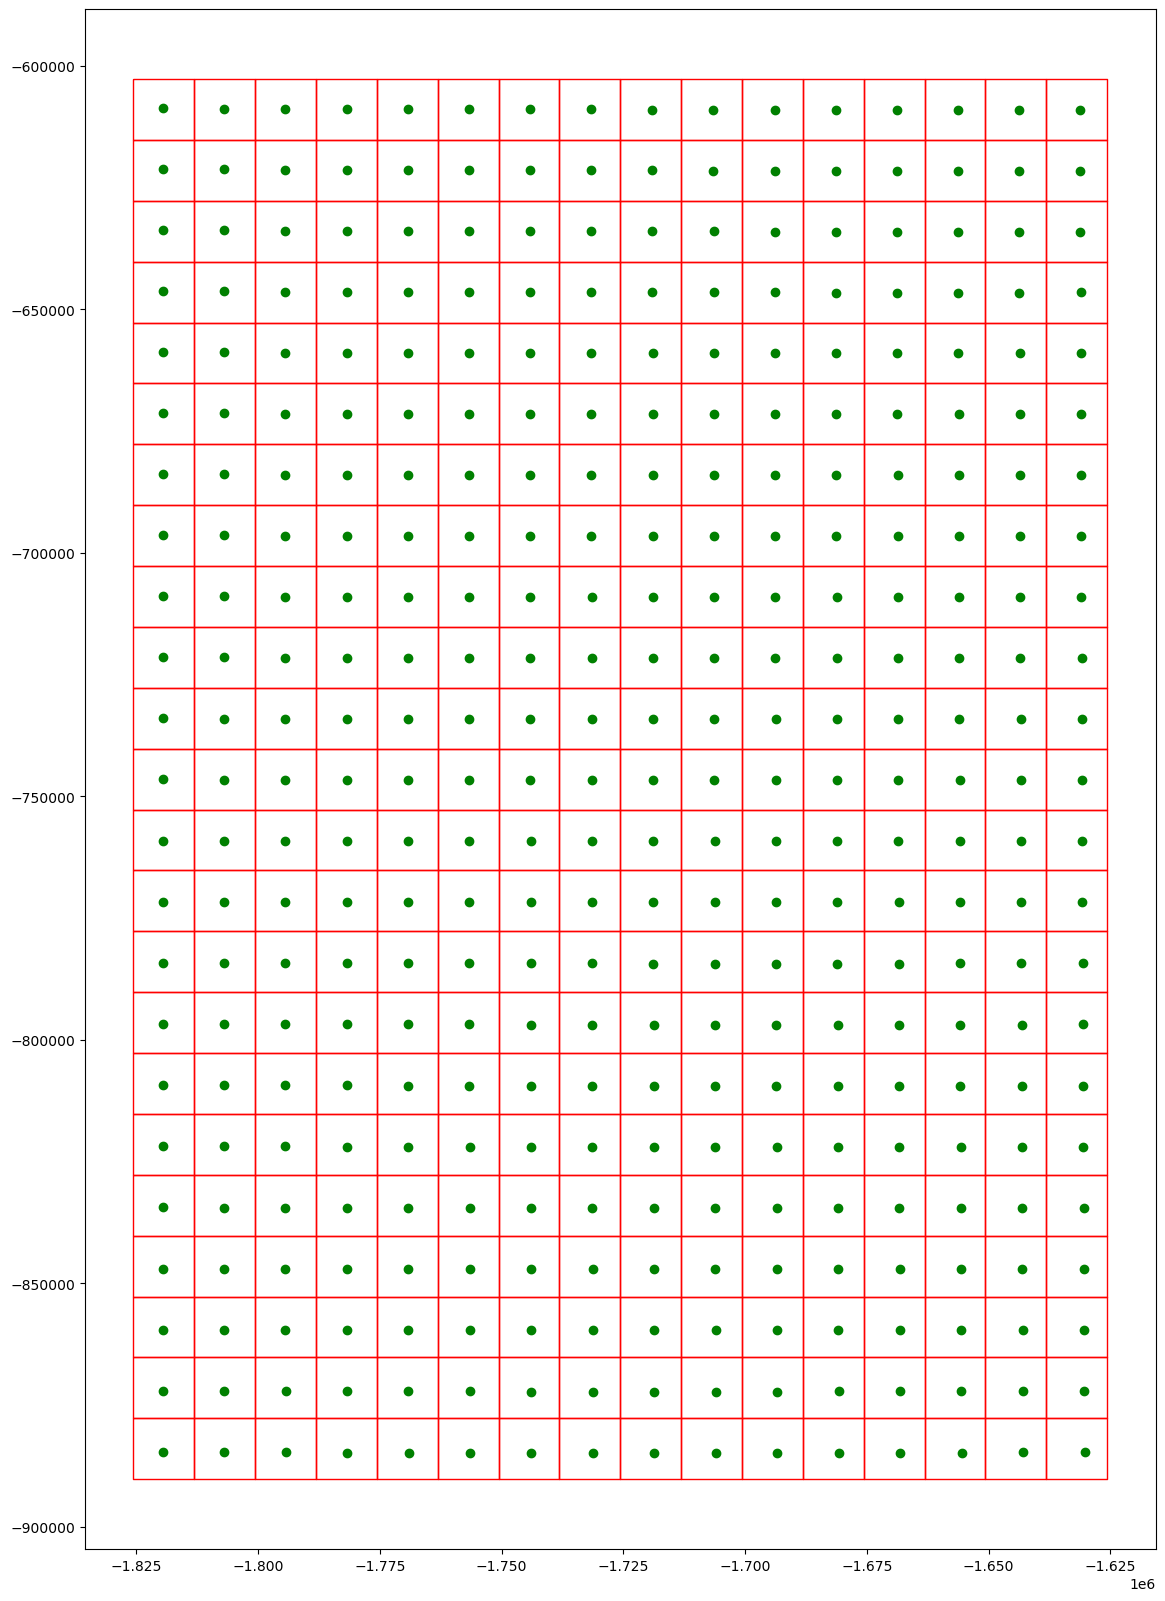

In [53]:
ax = wrlmt.plot(color='g', figsize=(15,20))
#a.plot(ax=ax, facecolor='none', edgecolor='purple' legend=True)
#sslmt.plot(ax=ax)
#lalmt.plot(ax=ax, facecolor='none', edgecolor='purple')
grid.plot(ax=ax, facecolor='none', edgecolor='r')